In [84]:
# Variáveis Iniciais do Sistema
plot_min_max_horizontal_lines = True

# Types = [bar,line]
plot_chart_type = 'line'

In [85]:
# Importações de Bibliotecas Necessárias
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
print("Reading CSV...")
df = pd.read_csv('generated_dataset.csv')
df = df.drop('timeTo',axis=1)

print("Setting the Pattern in DateTime Columns...")
df['timeFrom'] = pd.to_datetime(df['timeFrom'], errors='ignore')
df['timeFrom'] = pd.to_datetime(df["timeFrom"].dt.strftime('%d-%m-%Y %H:%M'))

print("Done!")

df

Reading CSV...
Setting the Pattern in DateTime Columns...
Done!


,timeFrom
0,2020-01-01 08:00:00
1,2020-01-01 08:00:00
2,2020-01-01 08:00:00
3,2020-01-01 08:00:00
4,2020-01-01 08:09:00
...,...
120937,2020-12-30 22:16:00
120938,2020-12-30 22:30:00
120939,2020-12-30 22:30:00
120940,2020-12-30 22:43:00


In [87]:
df1 = df.copy()

print("Setting the Pattern in DateTime Columns...")
df1['timeFrom'] = pd.to_datetime(df1['timeFrom'], errors='ignore')

print("Grouping by Day...")
df1 = df1.groupby(df1['timeFrom'].dt.date).size().reset_index(name='TotalParkings')

print("Done!")
df1

Setting the Pattern in DateTime Columns...
Grouping by Day...
Done!


,timeFrom,TotalParkings
0,2020-01-01,334
1,2020-01-02,310
2,2020-01-03,343
3,2020-01-04,380
4,2020-01-05,288
...,...,...
360,2020-12-26,328
361,2020-12-27,304
362,2020-12-28,384
363,2020-12-29,337


In [88]:
df2 = df1.copy()
print("Setting the Pattern in DateTime Columns...")
df2['timeFrom'] = pd.to_datetime(df2['timeFrom'], errors='ignore')

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
print("Grouping by Month")
df2 = df2.groupby(pd.Grouper(freq='M', key='timeFrom')).sum().reset_index()

print("Done!")
df2

Setting the Pattern in DateTime Columns...
Grouping by Month
Done!


,timeFrom,TotalParkings
0,2020-01-31,10235
1,2020-02-29,9593
2,2020-03-31,10198
3,2020-04-30,10213
4,2020-05-31,10091
5,2020-06-30,9942
6,2020-07-31,10306
7,2020-08-31,10139
8,2020-09-30,10173
9,2020-10-31,10224


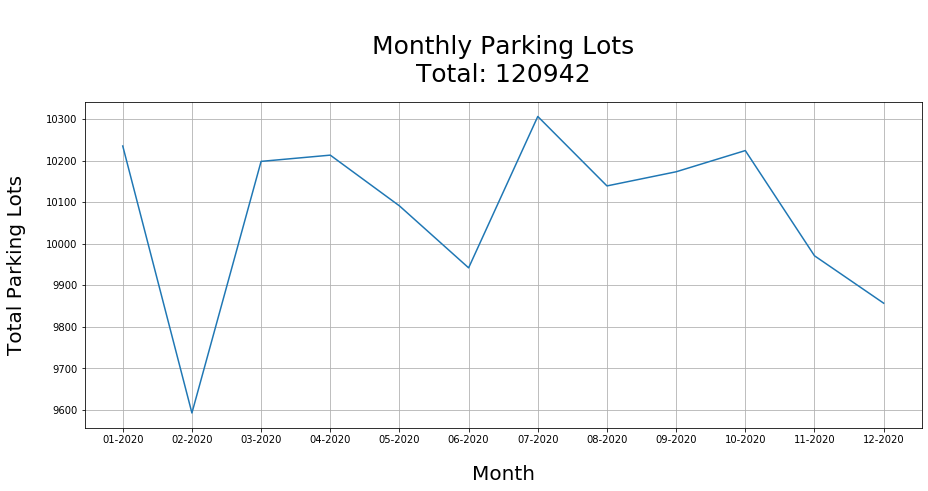

In [89]:
# Plot Graph with Y starting from the Lower Value (not zero)

df3 = df2.copy()

df3['timeFrom'] = df3['timeFrom'].dt.strftime('%m-%Y')

plt.subplots(figsize=(15,6))

#plt.axes(1).set_ylim(df3['TotalParkings'].min(),df3['TotalParkings'].max())
#plt.ylim(0,df3['TotalParkings'].max()*1.25)
plt.locator_params(axis='y', nbins=15)

plt.title("\nMonthly Parking Lots\nTotal: "+str(len(df['timeFrom'])), fontsize=25, pad=20)
plt.xlabel("Month", fontsize=20, labelpad=20)
plt.ylabel("Total Parking Lots", fontsize=20, labelpad=20)
plt.figure(1).set_facecolor((1, 1, 1))
plt.grid()

if (plot_chart_type == 'bar'):
    plt.bar(x=df3['timeFrom'], height=df3['TotalParkings'])
    df3 = df3.set_index('timeFrom')
else:
    df3 = df3.set_index('timeFrom')
    plt.plot(df3)

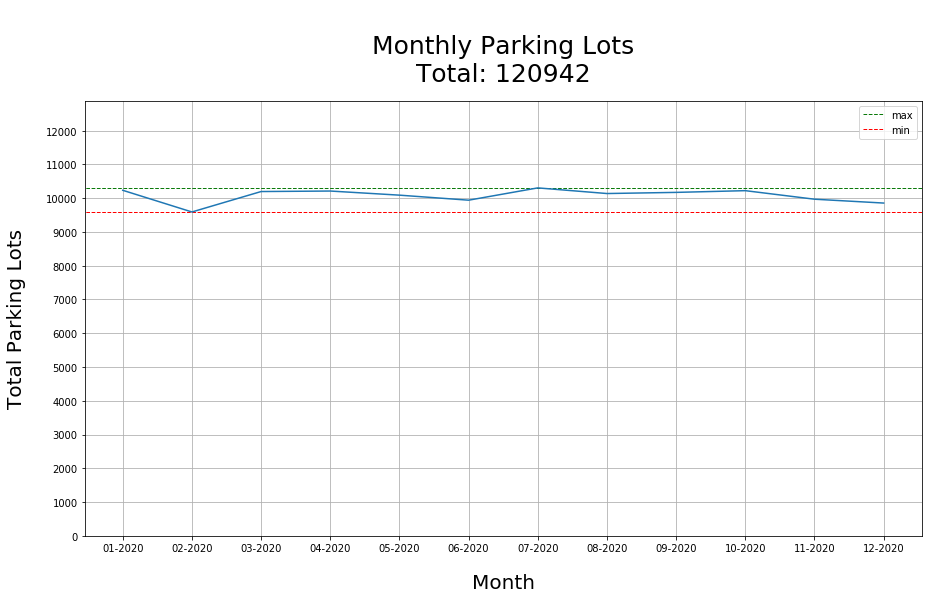

In [90]:
# Plot Same Graph but with Y starting from zero

df3 = df2.copy()

df3['timeFrom'] = df3['timeFrom'].dt.strftime('%m-%Y')

plt.subplots(figsize=(15,8))

plt.ylim(0,df3['TotalParkings'].max()*1.25)
plt.locator_params(axis='y', nbins=25)

if (plot_min_max_horizontal_lines):
    plt.hlines(df3['TotalParkings'].max(), colors='#0b7a0b', linestyles='dashed', label='max', xmin=-1, xmax=len(df3), lw=1)
    plt.hlines(df3['TotalParkings'].min(), colors='r', linestyles='dashed', label='min', xmin=-1, xmax=len(df3), lw=1)

plt.title("\nMonthly Parking Lots\nTotal: "+str(len(df['timeFrom'])), fontsize=25, pad=20)
plt.xlabel("Month", fontsize=20, labelpad=20)
plt.ylabel("Total Parking Lots", fontsize=20, labelpad=20)
plt.figure(1).set_facecolor((1, 1, 1))
plt.grid()
plt.legend()

if (plot_chart_type == 'bar'):
    plt.bar(x=df3['timeFrom'], height=df3['TotalParkings'])
    df3 = df3.set_index('timeFrom')
else:
    df3 = df3.set_index('timeFrom')
    plt.plot(df3)